# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [6]:
i = 0
for city in cities:
    i+=1
    print(f"{i}. {city}")

1. tuktoyaktuk
2. bredasdorp
3. arraial do cabo
4. hithadhoo
5. kodiak
6. puerto ayora
7. port alfred
8. portland
9. faanui
10. hambantota
11. toccoa
12. mar del plata
13. sakakah
14. mys shmidta
15. akdepe
16. mergui
17. rikitea
18. jamestown
19. rio gallegos
20. norman wells
21. port elizabeth
22. mataura
23. santa maria
24. atuona
25. busselton
26. solwezi
27. sur
28. kulu
29. bluff
30. korla
31. mahebourg
32. carnarvon
33. natal
34. longyearbyen
35. ushuaia
36. margate
37. mayo
38. oxapampa
39. saint-philippe
40. garissa
41. stornoway
42. burlington
43. suarez
44. dalbandin
45. albany
46. provideniya
47. punta arenas
48. lebu
49. mecca
50. enkoping
51. hermanus
52. faya
53. cape town
54. alvand
55. komsomolskiy
56. barrow
57. tubruq
58. hokitika
59. samarai
60. coahuayana
61. georgetown
62. nuuk
63. chunian
64. mullaitivu
65. luziania
66. kerman
67. kurchum
68. visnes
69. manicore
70. fare
71. camacupa
72. vaini
73. adeje
74. tumannyy
75. havoysund
76. taormina
77. butajira
78. nik

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# This code cell is taken from the course instructor's starter code file. I do not claim writing it, but I do understand what
# it is doing, in that it is requesting info from the Weather API, receiving it, and compiling it in a list for further use.

rows = []

for i in range(len(cities)):
    city = cities[i]
    
    # only print every 50th city
    if i % 50 == 0:
        print()
        print(f"Index: {i}, City: {city}")
    
    row = {}
    try:
    
        # get the geocode, lat and long
        url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}"
        response = requests.get(url)

        if (response.status_code == 200):
            data = response.json()

            # parse data
            if (len(data) > 0):
                lat = data[0]["lat"]
                lon = data[0]["lon"]

                # make second request to get weather
                url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
                response2 = requests.get(url2)

                if (response2.status_code == 200):
                    data2 = response2.json()

                    # parse data
                    weather = data2["weather"][0]["main"]
                    temp = data2["main"]["temp"]
                    humid = data2["main"]["humidity"]
                    pressure = data2["main"]["pressure"]
                    wind = data2["wind"]["speed"]
                    clouds = data2["clouds"]["all"]
                else:
                    print(f"Weather request failed for {city}")
                    weather = None
                    temp = np.nan
                    humid = np.nan
                    pressure = np.nan
                    wind = np.nan
                    clouds = np.nan

                # put into flat dictionary
                row["city"] = city
                row["latitude"] = lat
                row["longitude"] = lon
                row["weather"] = weather
                row["temperature"] = temp
                row["humidity"] = humid
                row["pressure"] = pressure
                row["wind_speed"] = wind
                row["cloudiness"] = clouds

                # append to list
                rows.append(row)

            else:
                print(f"no lat/long for {city}")
                pass
        else:
            print(f"failed request for geocode for {city}")
            pass
    except Exception as e:
        print(e)
        print(f"Oh no! Everything failed and broke for {city}. There should be an error above. Sux")
        print()
        
    # sleep
    time.sleep(2)


Index: 0, City: tuktoyaktuk

Index: 50, City: hermanus
no lat/long for kurchum
no lat/long for tumannyy
no lat/long for gubkinskiy

Index: 100, City: ahipara
no lat/long for yar-sale
no lat/long for taolanaro

Index: 150, City: sentyabrskiy
no lat/long for sentyabrskiy
no lat/long for saleaula
no lat/long for ugoofaaru
no lat/long for tabiauea

Index: 200, City: kamenka
no lat/long for mrirt
no lat/long for meyungs
no lat/long for skalistyy

Index: 250, City: leo
no lat/long for vitimskiy
no lat/long for tazovskiy
no lat/long for beringovskiy

Index: 300, City: havelock
no lat/long for kosya

Index: 350, City: thunder bay
no lat/long for gazanjyk

Index: 400, City: yilan
no lat/long for warqla
no lat/long for north marysville

Index: 450, City: la ronge
no lat/long for severo-yeniseyskiy
no lat/long for chagda
no lat/long for qianan

Index: 500, City: cozumel
no lat/long for pokrovsk-uralskiy
no lat/long for toliary

Index: 550, City: bicaz

Index: 600, City: ambilobe
no lat/long for 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame(rows)
weather_df.head()

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness
0,tuktoyaktuk,69.444019,-133.031904,Clouds,-4.00,84,1025,6.91,40
1,bredasdorp,-34.533055,20.042778,Clouds,69.35,89,1012,2.59,56
2,arraial do cabo,-22.966284,-42.024427,Clouds,73.38,64,1014,6.91,40
3,hithadhoo,1.795942,73.387552,Clouds,81.00,74,1009,10.83,79
4,kodiak,57.790000,-152.407222,Clouds,35.11,100,1016,0.00,100


In [9]:
weather_df.describe()

,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,21.458234,15.193679,48.577079,75.353135,1015.084158,7.698168,58.004950
std,32.110606,89.295713,30.460147,20.265528,10.378674,5.639074,38.978337
min,-54.806116,-179.413096,-51.920000,12.000000,967.000000,0.000000,0.000000
25%,-3.740802,-63.037512,27.047500,66.000000,1009.000000,3.495000,19.000000
50%,26.471210,15.202939,59.250000,79.500000,1012.500000,6.555000,69.000000
75%,47.575982,90.082140,73.765000,91.000000,1020.000000,10.390000,99.000000
max,81.142079,178.680784,87.530000,100.000000,1058.000000,39.820000,100.000000


In [10]:
weather_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
mask = weather_df.humidity > 100
weather_df.loc[mask]

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness


In [12]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         606 non-null    object 
 1   latitude     606 non-null    float64
 2   longitude    606 non-null    float64
 3   weather      606 non-null    object 
 4   temperature  606 non-null    float64
 5   humidity     606 non-null    int64  
 6   pressure     606 non-null    int64  
 7   wind_speed   606 non-null    float64
 8   cloudiness   606 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 42.7+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

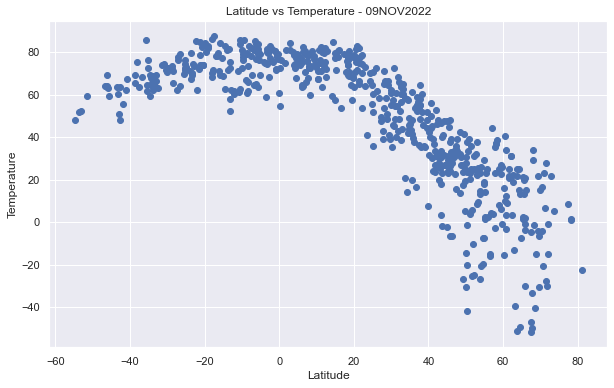

In [26]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.scatter(weather_df.latitude, weather_df.temperature)
plt.title("Latitude vs Temperature - 09NOV2022")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

The above scatter plot displays data for the current temperature of all of the cities of interest, versus their latitude value on the Earth.

## Latitude vs. Humidity Plot

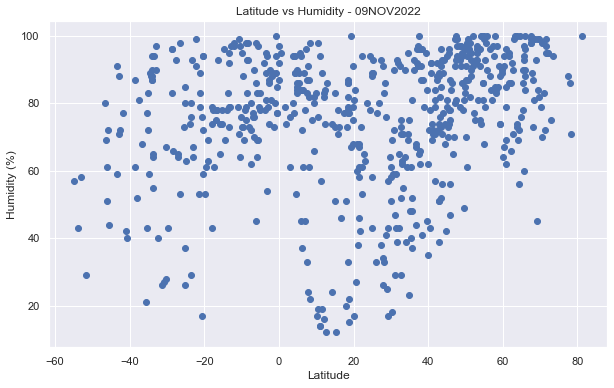

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.scatter(weather_df.latitude, weather_df.humidity)
plt.title("Latitude vs Humidity - 09NOV2022")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

The above scatter plot displays data for the current humidity of all of the cities of interest, versus their latitude value on the Earth. Data appears to show that humidity is higher as latitude is higher.

## Latitude vs. Cloudiness Plot

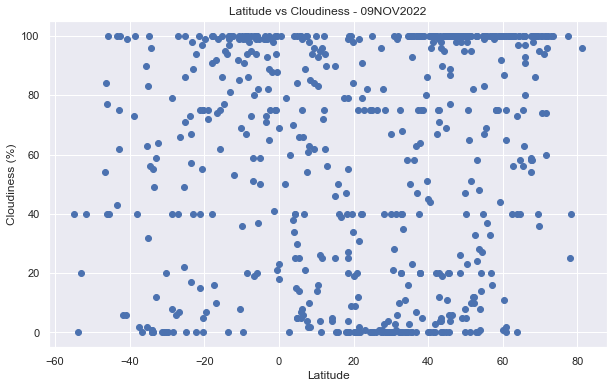

In [29]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.scatter(weather_df.latitude, weather_df.cloudiness)
plt.title("Latitude vs Cloudiness - 09NOV2022")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The above scatter plot displays data for the current cloudiness percentage of all of the cities of interest, versus their latitude value on the Earth. Data appears to show that cloudiness varies and does not correlate with latitude.

## Latitude vs. Wind Speed Plot

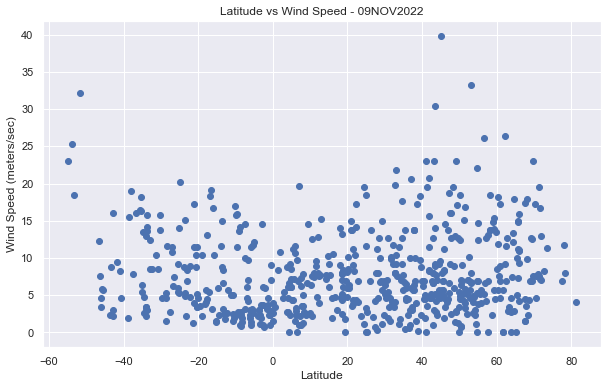

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
plt.scatter(weather_df.latitude, weather_df.wind_speed)
plt.title("Latitude vs Wind Speed - 09NOV2022")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meters/sec)')
plt.show()

The above scatter plot displays data for the current wind speed of all of the cities of interest, versus their latitude value on the Earth. Data appears to show that wind speed is generally below 10 meters per second, regardless of a city's latitude.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7289586712100267


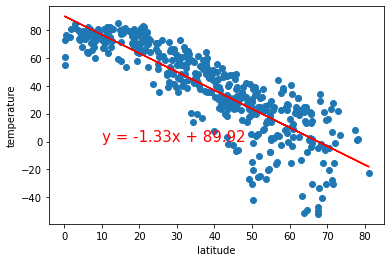

In [17]:
# The code cell again is borrowed and credited to the course instructor with some minor tweaks. I do understand that this code
# is constructing a scatter plot of max temp vs latitude for cities located in the northern hemisphere, and also displaying a 
# regression line that emphasizes a correlation of data for as a city is higher in latitude, it is also lower in temperature.

df2 = weather_df.loc[weather_df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a correlation in data for cities in latitude and temperature, where the higher the latitude of the city, generally the temperature will be lower.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.30143187152490264


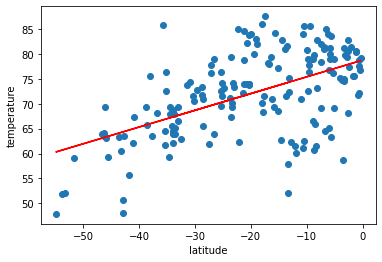

In [18]:
df3 = weather_df.loc[weather_df.latitude < 0].reset_index(drop=True)

x_values = df3['latitude']
y_values = df3['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a correlation in data for cities in latitude and temperature, where the higher the latitude of the city, generally the temperature will be higher as well.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11693570270738686


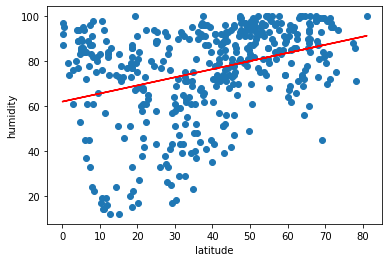

In [19]:
df4 = weather_df.loc[weather_df.latitude > 0].reset_index(drop=True)

x_values = df4['latitude']
y_values = df4['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a slight correlation in data for cities in humidity and latitude, where the higher the latitude of the city, generally the humidity will be higher as well.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1420667954454598


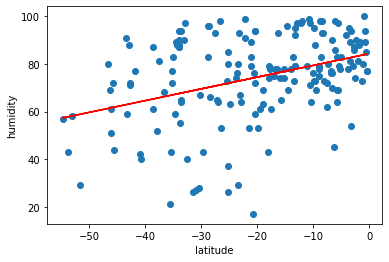

In [20]:
df5 = weather_df.loc[weather_df.latitude < 0].reset_index(drop=True)

x_values = df5['latitude']
y_values = df5['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a slight correlation in data for cities in humidity and latitude, where the higher the latitude of the city, generally the humidity will be higher as well.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08435540636355139


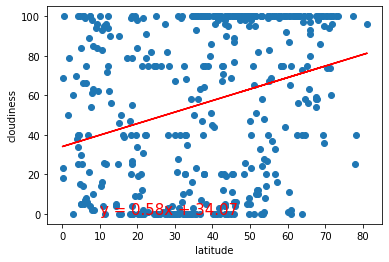

In [21]:
df6 = weather_df.loc[weather_df.latitude > 0].reset_index(drop=True)

x_values = df6['latitude']
y_values = df6['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a not much of a correlation in data for cities in cloudiness and latitude, however, most cities either appear to be not cloudy at all or very cloudy.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16101817016061912


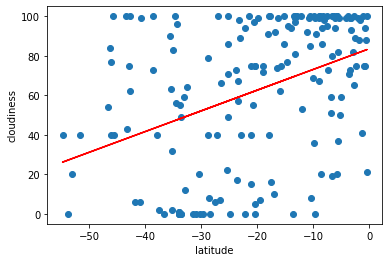

In [22]:
df7 = weather_df.loc[weather_df.latitude < 0].reset_index(drop=True)

x_values = df7['latitude']
y_values = df7['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a not much of a correlation in data for cities in cloudiness and latitude, however, most cities either appear to be not cloudy at all or very cloudy.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.031078763773915684


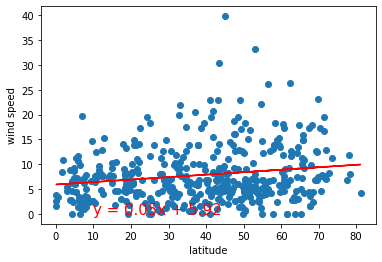

In [23]:
df8 = weather_df.loc[weather_df.latitude > 0].reset_index(drop=True)

x_values = df8['latitude']
y_values = df8['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a not much of a correlation in data for cities in wind speed and latitude, however, most cities appear to not have very high wind speeds.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15593952240973574


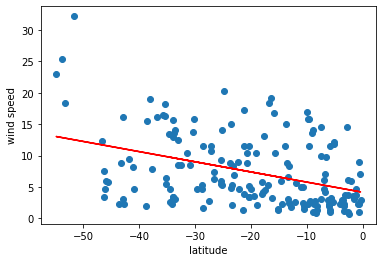

In [24]:
df9 = weather_df.loc[weather_df.latitude < 0].reset_index(drop=True)

x_values = df9['latitude']
y_values = df9['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a not much of a correlation in data for cities in wind speed and latitude, however, most cities appear to not have very high wind speeds.